In [4]:
library(tidyverse)


In [39]:
set.seed(42)

Data <- read_csv('spotify_audio_features.csv')


summary(Data)


Rows: 1229 Columns: 19
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (3): spotify_id, artist, title
dbl (16): speechiness, key, time_signature, liveness, loudness, duration_ms,...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


  speechiness           key         time_signature     liveness     
 Min.   :0.02330   Min.   : 0.000   Min.   :3.000   Min.   :0.0210  
 1st Qu.:0.03670   1st Qu.: 2.000   1st Qu.:4.000   1st Qu.:0.0889  
 Median :0.05190   Median : 5.000   Median :4.000   Median :0.1310  
 Mean   :0.08762   Mean   : 5.219   Mean   :3.987   Mean   :0.1887  
 3rd Qu.:0.09980   3rd Qu.: 8.000   3rd Qu.:4.000   3rd Qu.:0.2510  
 Max.   :0.51700   Max.   :11.000   Max.   :5.000   Max.   :0.9040  
 NA's   :32        NA's   :32       NA's   :33      NA's   :32      
    loudness        duration_ms      danceability       duration    
 Min.   :-14.001   Min.   :102857   Min.   :0.2090   Min.   :125.0  
 1st Qu.: -6.362   1st Qu.:206413   1st Qu.:0.5530   1st Qu.:203.0  
 Median : -5.162   Median :226739   Median :0.6460   Median :221.0  
 Mean   : -5.432   Mean   :230727   Mean   :0.6405   Mean   :221.6  
 3rd Qu.: -4.150   3rd Qu.:247680   3rd Qu.:0.7310   3rd Qu.:237.0  
 Max.   : -1.600   Max.   :484147 

In [6]:
#removing all the rows with NA/Null
Data <- Data[complete.cases(Data),]

In [7]:
#Finding unique songs

length(unique(Data$spotify_id))   #counting unique songs
length(unique(Data$title))

[1] 1192

[1] 1161

In [8]:
#Identifying features
index_cols = c("artist", "title", "spotify_id","volume_number","number")
cat_cols = c("mode","key")
num_cols = c("speechiness","duration","time_signature","acousticness","danceability","energy"
             ,"instrumentalness","liveness","loudness","valence","tempo")


Warning message:
“Using an external vector in selections was deprecated in tidyselect 1.1.0.
ℹ Please use `all_of()` or `any_of()` instead.
  # Was:
  data %>% select(num_cols)

  # Now:
  data %>% select(all_of(num_cols))

See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>.”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

corrplot 0.92 loaded



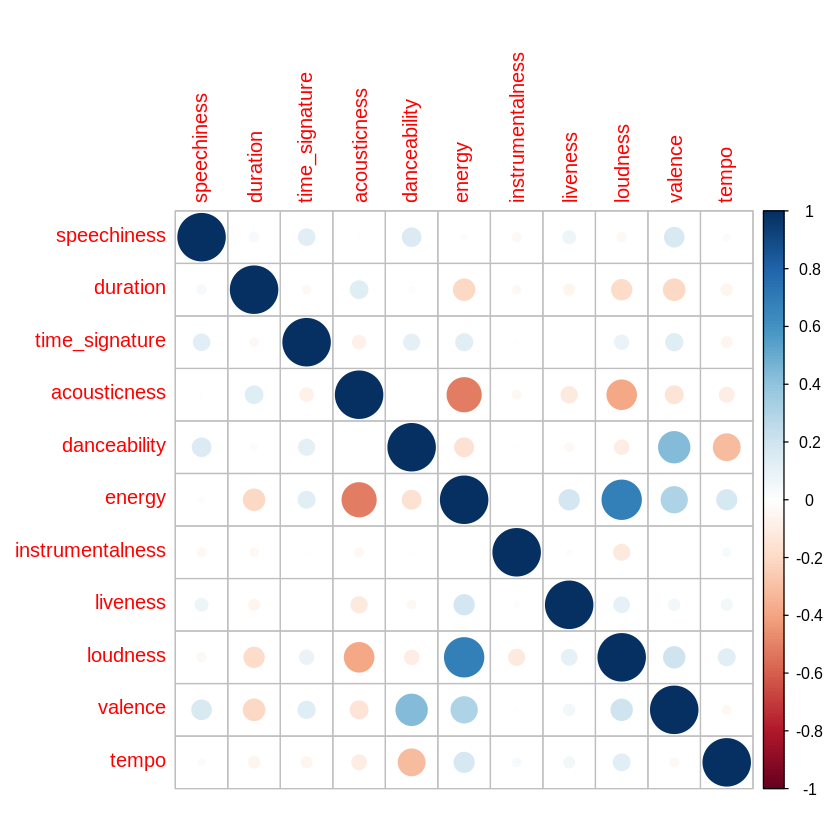

In [9]:
#Subsetting numeric data
Num_Data <- Data %>%
  select(num_cols)

#Checking Correlation between variables
install.packages("corrplot")
library(corrplot)
M<-cor(Num_Data)
corrplot(M, method="circle")

  speechiness         duration        time_signature      acousticness    
 Min.   :-0.7883   Min.   :-3.54633   Min.   :-5.47924   Min.   :-0.6964  
 1st Qu.:-0.6234   1st Qu.:-0.64899   1st Qu.: 0.06959   1st Qu.:-0.6411  
 Median :-0.4370   Median :-0.02551   Median : 0.06959   Median :-0.4161  
 Mean   : 0.0000   Mean   : 0.00000   Mean   : 0.00000   Mean   : 0.0000  
 3rd Qu.: 0.1511   3rd Qu.: 0.56129   3rd Qu.: 0.06959   3rd Qu.: 0.2349  
 Max.   : 5.2859   Max.   : 4.81561   Max.   : 5.61843   Max.   : 4.7480  
  danceability          energy        instrumentalness     liveness      
 Min.   :-3.19830   Min.   :-3.9400   Min.   :-0.1443   Min.   :-1.1408  
 1st Qu.:-0.64850   1st Qu.:-0.6319   1st Qu.:-0.1443   1st Qu.:-0.6789  
 Median : 0.04084   Median : 0.1204   Median :-0.1443   Median :-0.3922  
 Mean   : 0.00000   Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.0000  
 3rd Qu.: 0.67087   3rd Qu.: 0.8140   3rd Qu.:-0.1441   3rd Qu.: 0.4244  
 Max.   : 2.42015   Max.   : 1.

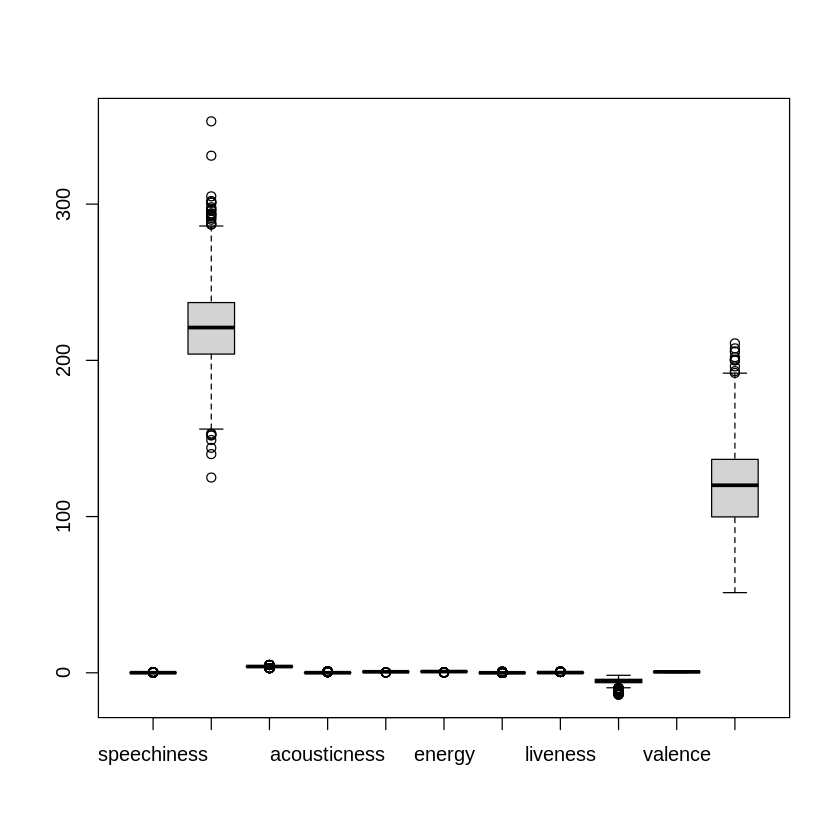

In [10]:
#Pre-processing the data
boxplot(Num_Data)
Num_Data_Norm <- sapply(Num_Data, scale)   #Normalized Numerical Data
#boxplot(Num_Data_Norm)
summary(Num_Data_Norm)

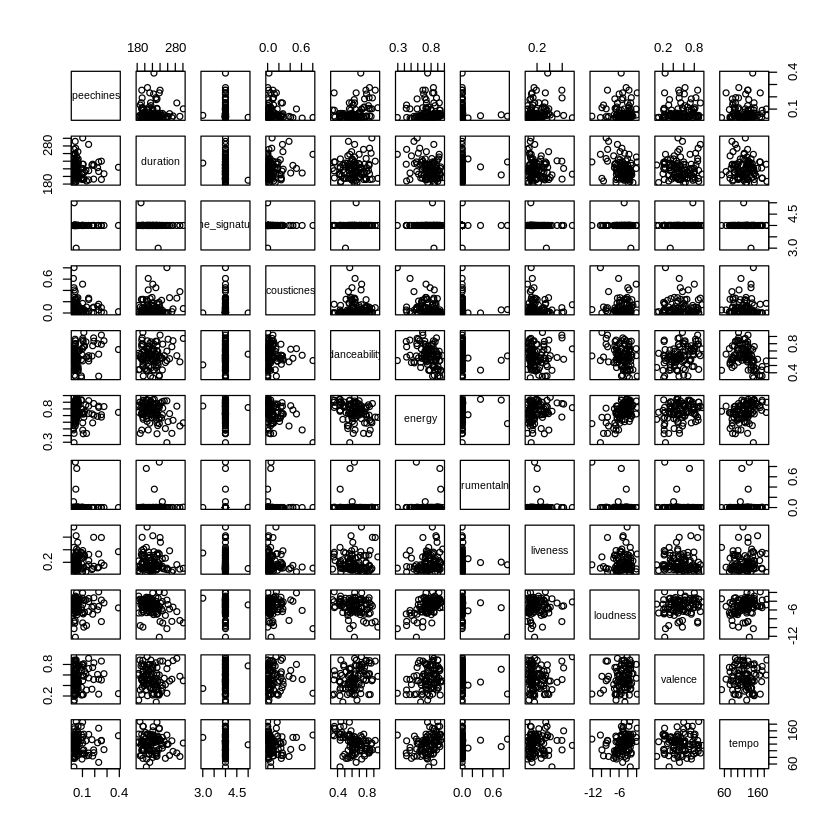

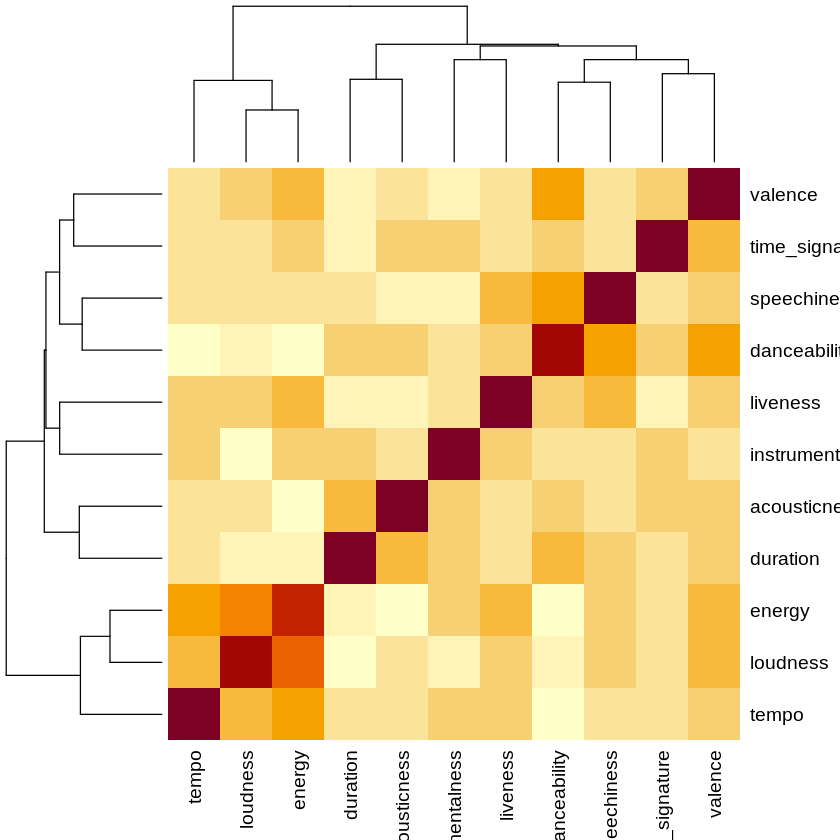

In [11]:
# Sample data for visualization
sample_data <- Num_Data[sample(nrow(Num_Data), 100), ]

# Scatter plot matrix
pairs(sample_data)

# Heatmap
heatmap(cor(sample_data))


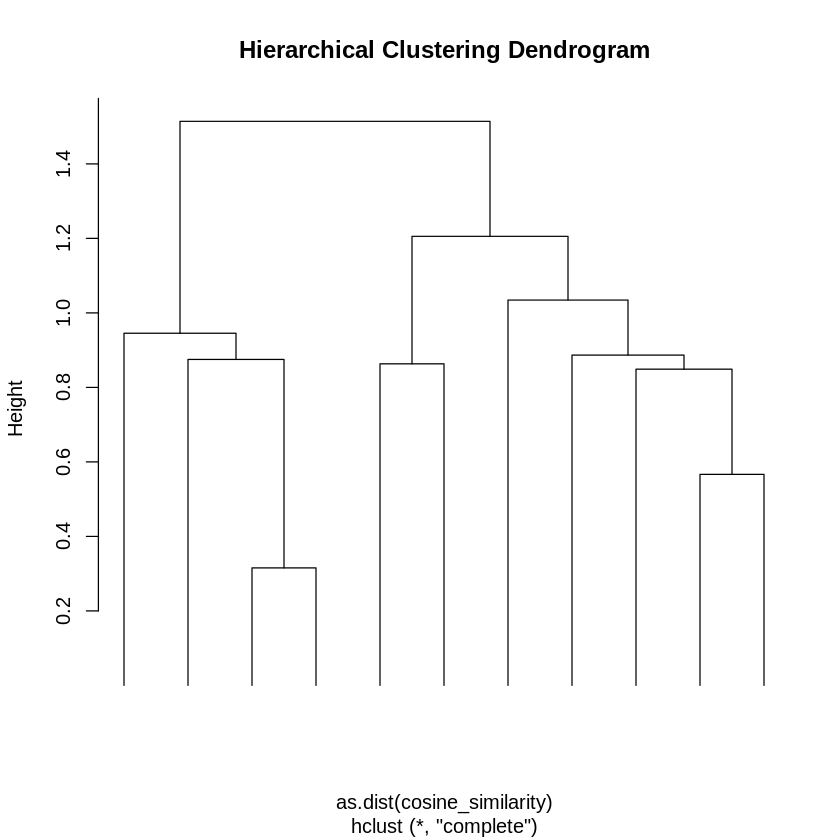

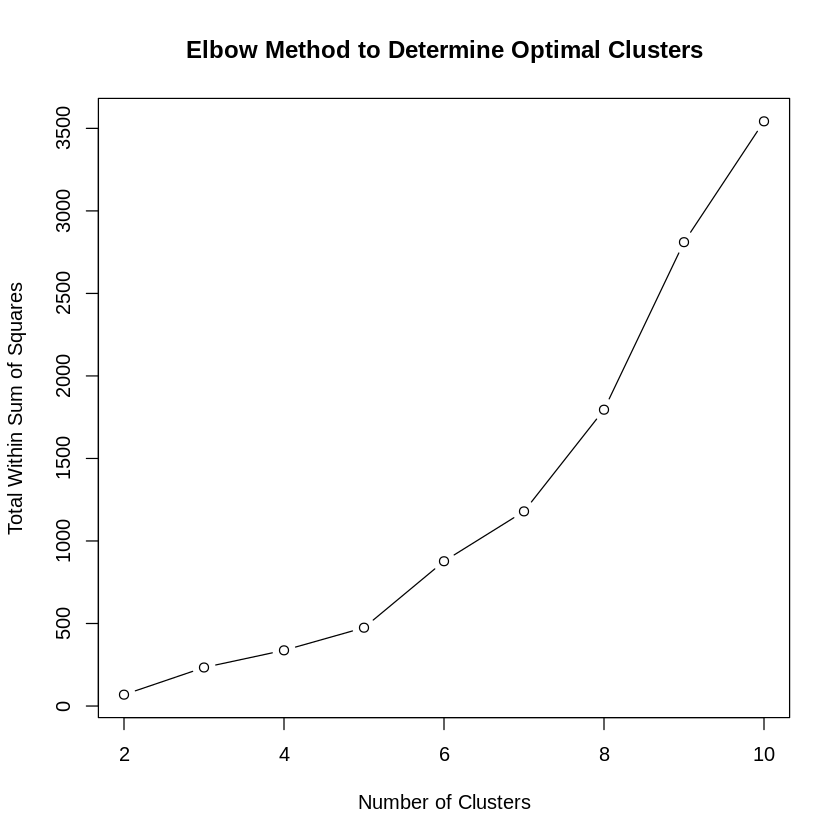

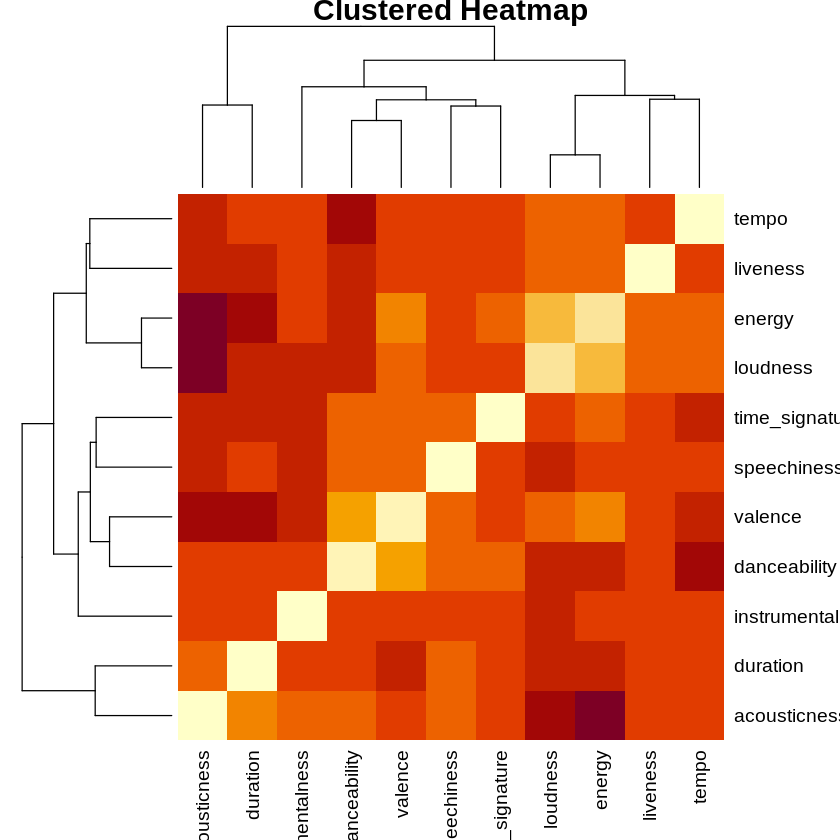

In [16]:
# Calculate cosine similarity
cosine_similarity <- 1 - M

# Perform hierarchical clustering
hc <- hclust(as.dist(cosine_similarity), method = "complete")

# Visualize the dendrogram
plot(hc, hang = -1, cex = 0.6, main = "Hierarchical Clustering Dendrogram", labels = FALSE)

# Determine optimal number of clusters using the elbow method
distances <- c()
for (i in 2:10) {
  kmeans <- cutree(hc, k = i)
  distances <- c(distances, sum((cosine_similarity - kmeans)^2))
}

# Plot the elbow curve
plot(2:10, distances, type = "b", main = "Elbow Method to Determine Optimal Clusters", xlab = "Number of Clusters", ylab = "Total Within Sum of Squares")

# Based on the elbow method, visually determine the optimal number of clusters

# Cut the dendrogram to get the clusters
optimal_clusters <- cutree(hc, k = 3)

# Visualize the clustered heatmap
heatmap(cosine_similarity[order(optimal_clusters), order(optimal_clusters)],
        Rowv = optimal_clusters, Colv = optimal_clusters,
        main = "Clustered Heatmap")

# You may want to customize the plot further based on your specific needs


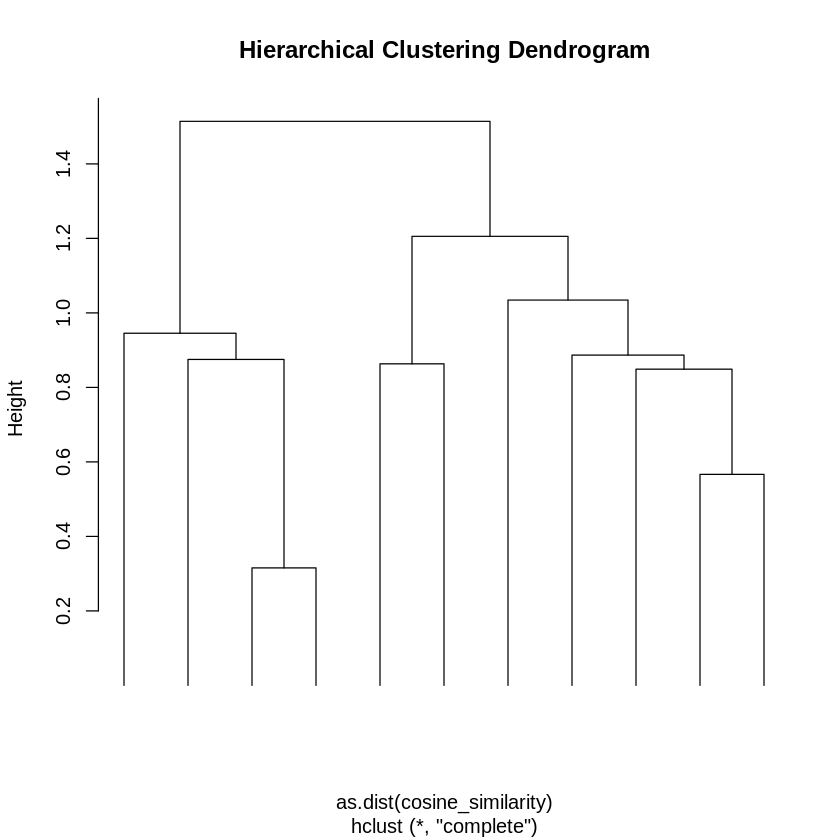

In [28]:
# Perform hierarchical clustering
hc <- hclust(as.dist(cosine_similarity), method = "complete")

# Visualize the dendrogram
plot(hc, hang = -1, cex = 0.6, main = "Hierarchical Clustering Dendrogram", labels = FALSE)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 


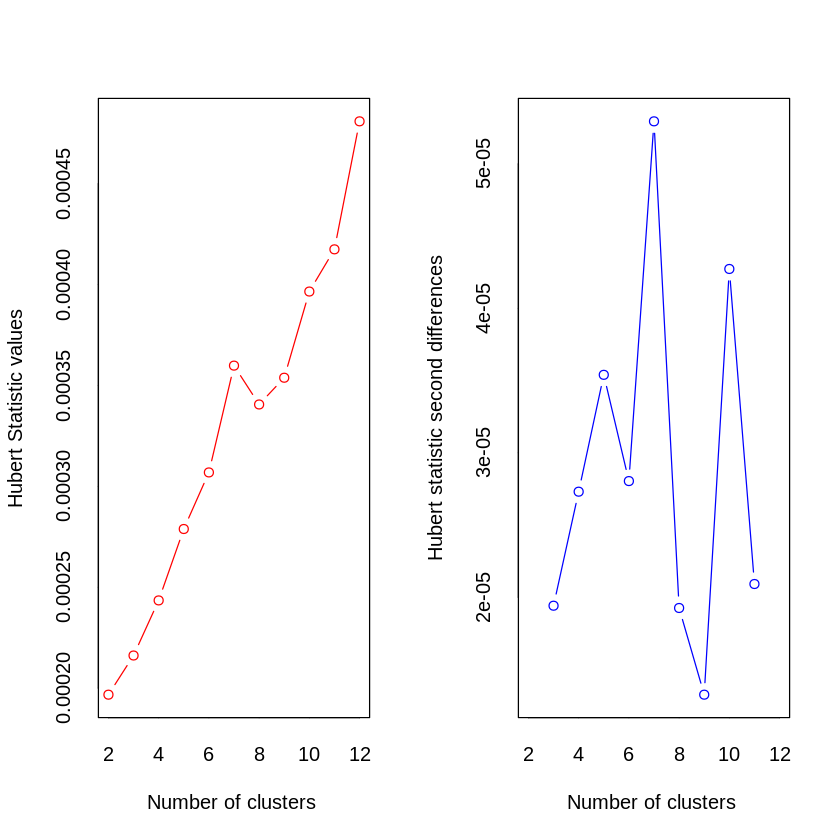

*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 
******************************************************************* 
* Among all indices:                                                
* 5 proposed 2 as the best number of clusters 
* 5 proposed 3 as the best number of clusters 
* 2 proposed 6 as the best number of clusters 
* 4 proposed 7 as the best number of clusters 
* 2 proposed 11 as the best number of clusters 
* 6 proposed 12 as the best number of clusters 

                   ***** Conclusion *****                            
 
* According to the majority rule, the best number of clusters is  12 
 
 
******************************************************************* 


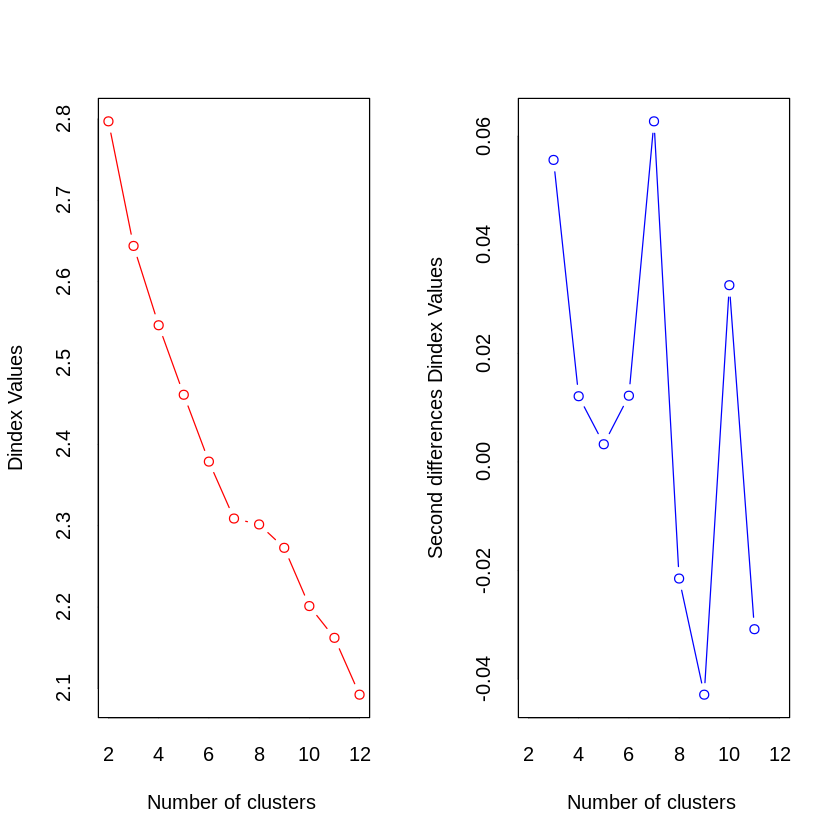

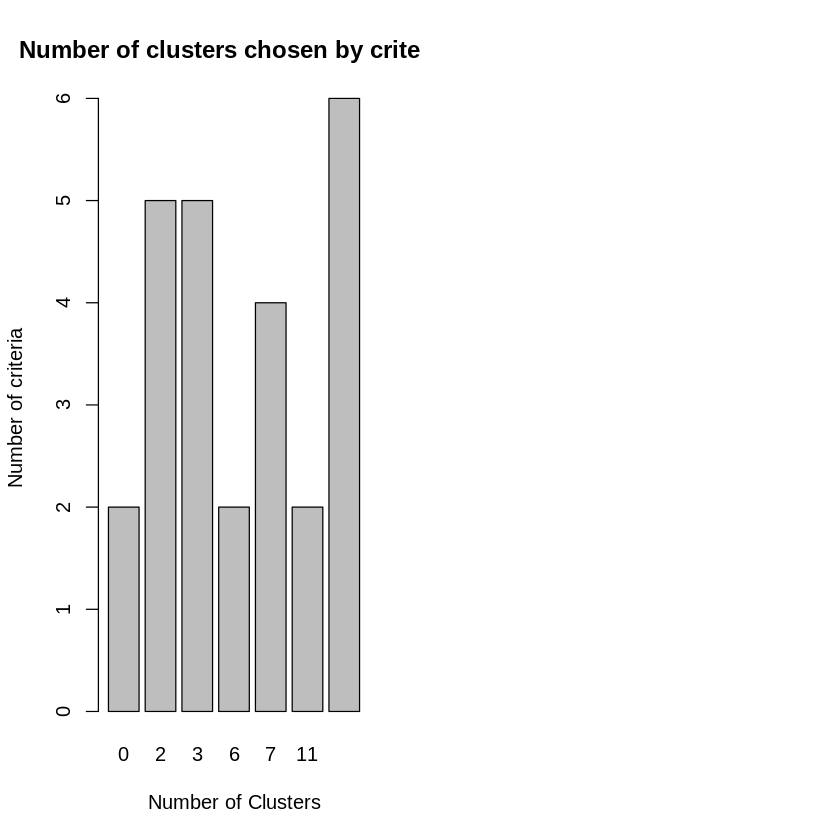

In [32]:
#Clustering the data ----
install.packages("NbClust")
#Finding optimum number of clusters
library(NbClust)
optimum <- NbClust(Num_Data_Norm, distance='euclidean', max.nc=12, method="kmeans")
#table(optimum$Best.nc[1,])
barplot(table(optimum$Best.nc[1,]), xlab="Number of Clusters", ylab="Number of criteria",
        main="Number of clusters chosen by criteria")

In [33]:
# Perform k-means cluster analysis, set 8 clusters as suggested by above method
fit.km <- kmeans(Num_Data_Norm, 8, nstart=25, iter.max = 30)

Data$Cluster <- fit.km$cluster


In [34]:
#Summary of the clusters
print("Size of clusters:")
fit.km$size
print("Centers:")
fit.km$centers

print("Total Sum of Squares (SS):")
fit.km$totss

print("Within Clusters SS")
fit.km$withinss

print("Total Within Clusters SS")
fit.km$tot.withinss

print("Between Clusters SS")
fit.km$betweenss


#fit.km$iter
#fit.km$ifault

[1] "Size of clusters:"


[1] 260 322 232  86  27 129 128  12

[1] "Centers:"


,speechiness,duration,time_signature,acousticness,danceability,energy,instrumentalness,liveness,loudness,valence,tempo
1,-0.39867546,0.1560289,0.15495905,-0.30409182,-0.9368909,0.23430751,-0.06813870,-0.27439287,0.20940199,-0.84542179,0.62989992
2,-0.28350991,-0.5452298,0.10405719,-0.24631319,0.2998479,0.61646648,-0.09710282,-0.30605306,0.59967063,0.72170261,-0.17519103
3,-0.24386311,0.4052619,0.06959239,-0.09056468,0.7103614,-0.66558726,-0.09900761,-0.28847623,-0.59793935,-0.01241319,-0.54953841
4,-0.25146139,0.3190628,0.13411370,2.47261910,-0.2497919,-1.80177633,-0.11666978,-0.32887794,-1.51811544,-0.78033941,-0.25379307
5,-0.21988728,0.2923383,-5.47924059,0.66993336,-1.2159443,-0.92140311,0.01662928,-0.22253961,-0.65135877,-0.97280968,0.40266805
6,2.24590695,0.2562317,0.28466343,0.02747517,0.3906451,0.02123359,-0.14189505,-0.02889367,-0.08016834,0.38232681,0.01248771
7,-0.06037487,-0.1802365,0.06959239,-0.41313655,-0.1360731,0.57799152,-0.07455732,2.13338063,0.48248721,0.23631735,0.21623230
8,-0.24244362,-0.3617021,0.06959239,-0.16737804,0.2977915,-0.15810956,9.11544546,0.14702917,-1.00738027,0.34229652,0.14966339


[1] "Total Sum of Squares (SS):"


[1] 13145

[1] "Within Clusters SS"


[1] 1316.5000 1279.0722 1220.4116  755.1785  327.5227 1082.0725  802.2208
[8]  198.3695

[1] "Total Within Clusters SS"


[1] 6981.348

[1] "Between Clusters SS"


[1] 6163.652

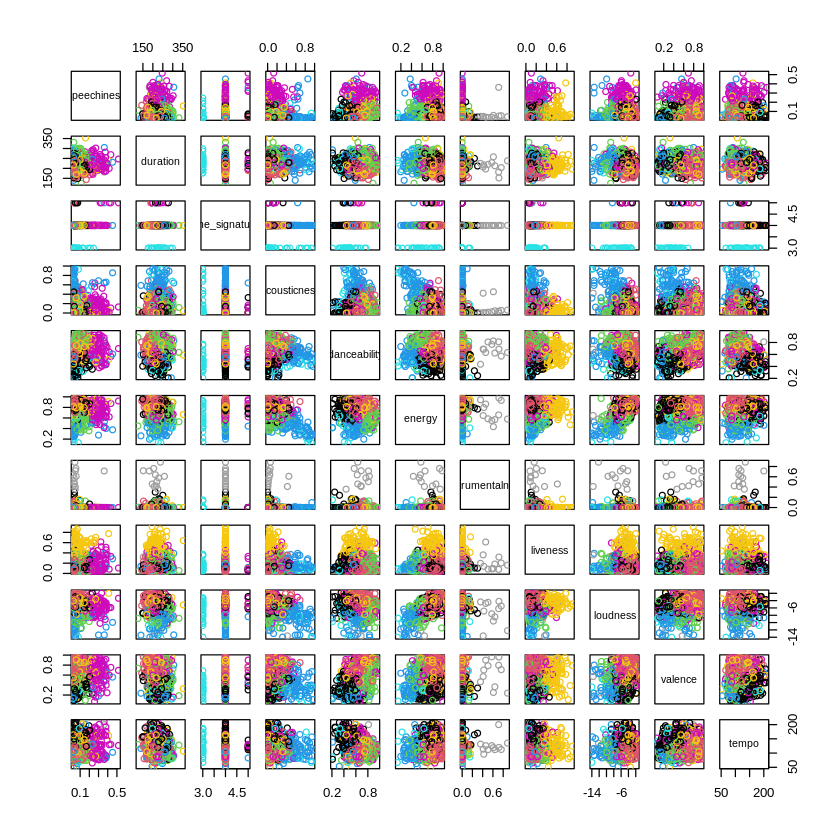

In [35]:
#Visualizing clusters in a magnificent way
plot(Num_Data, col=Data$Cluster)

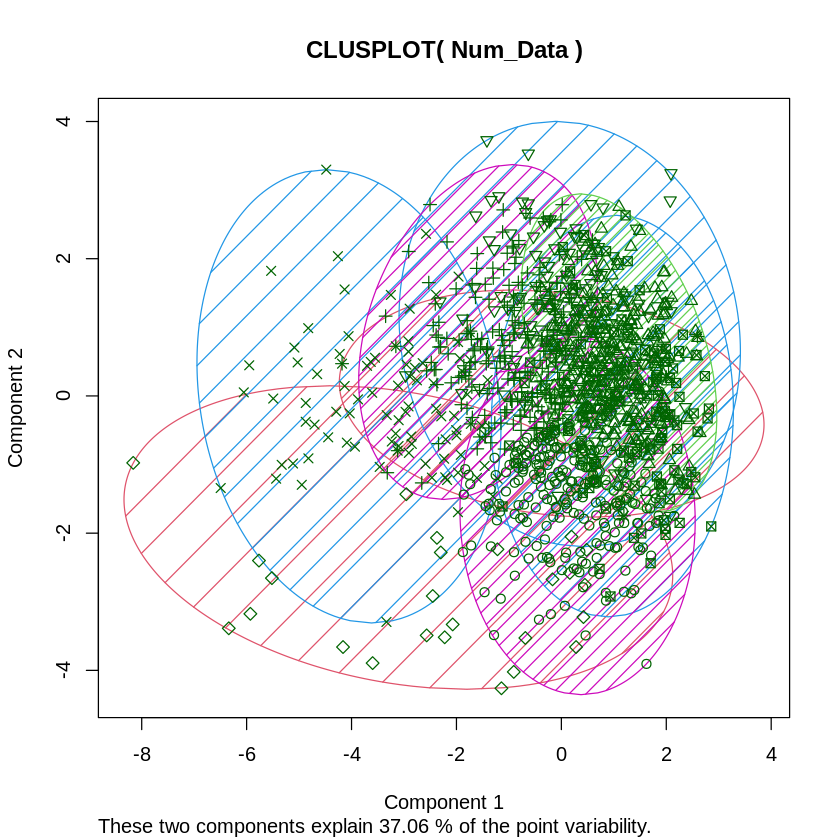

In [36]:
# Cluster Plot against 1st 2 principal components
library(cluster)
clusplot(Num_Data, Data$Cluster, color=TRUE, shade=TRUE,
         labels=8)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



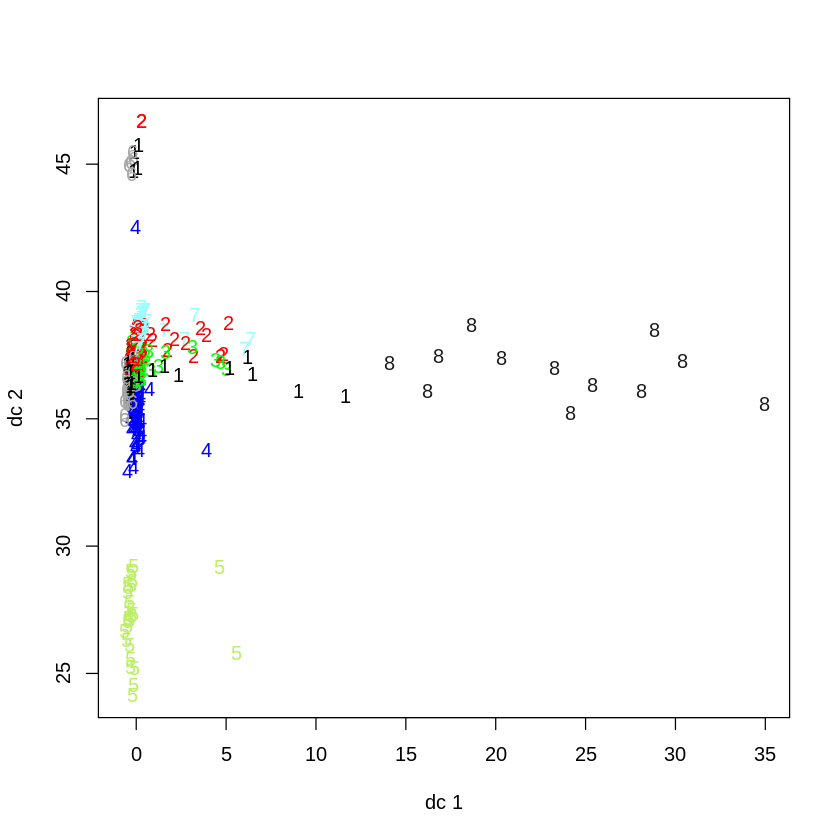

In [37]:
# Centroid Plot against 1st 2 discriminant functions
install.packages("fpc")
library(fpc)
plotcluster(Num_Data, Data$Cluster)

Package 'mclust' version 6.1
Type 'citation("mclust")' for citing this R package in publications.


Attaching package: ‘mclust’


The following object is masked from ‘package:purrr’:

    map




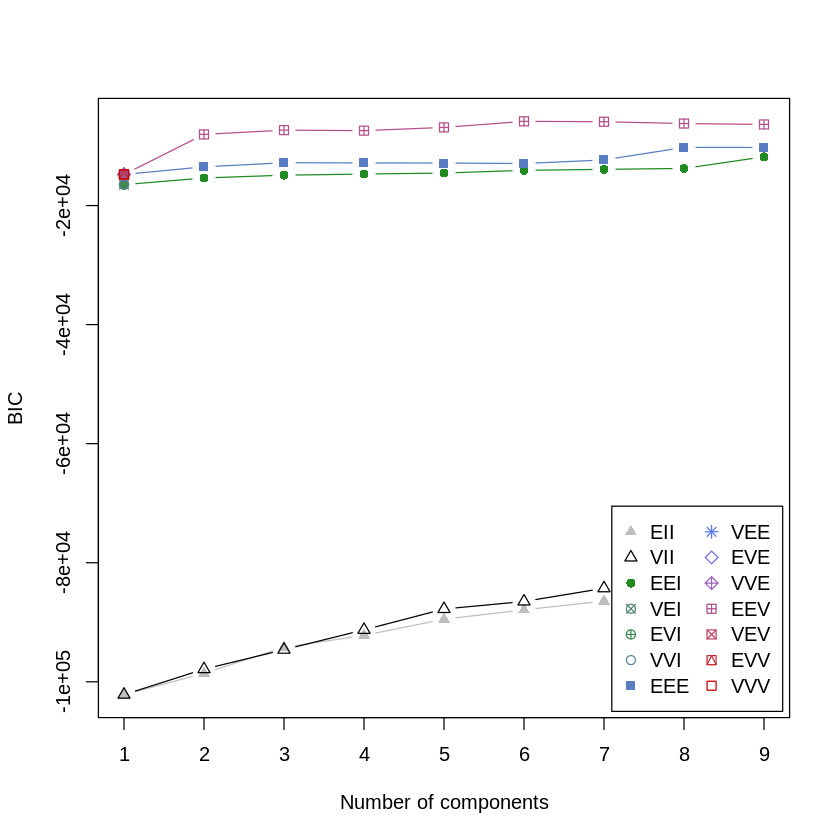

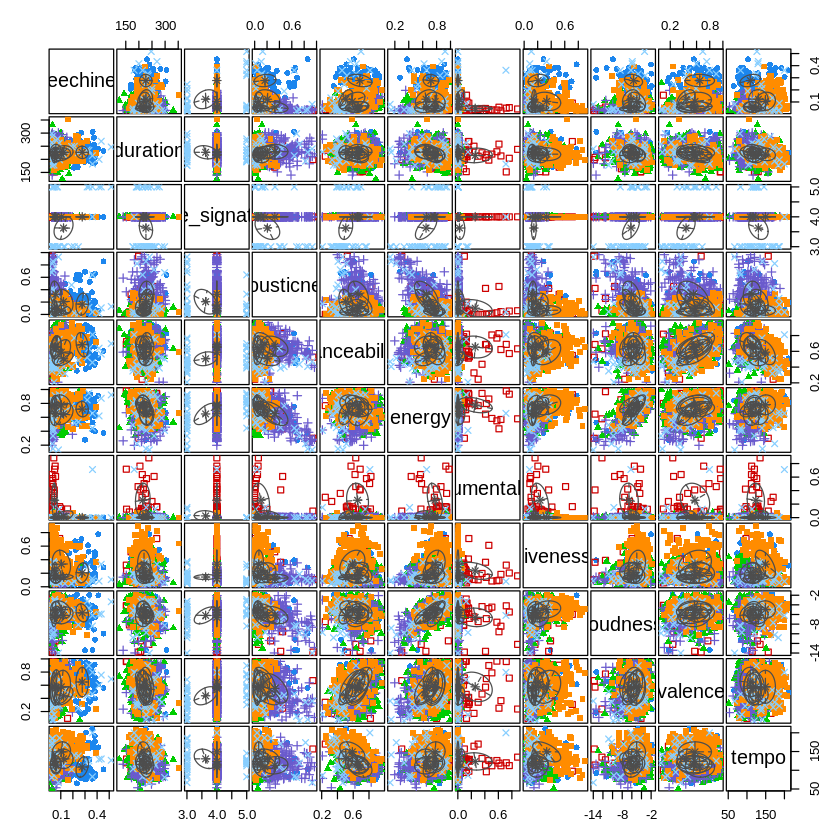

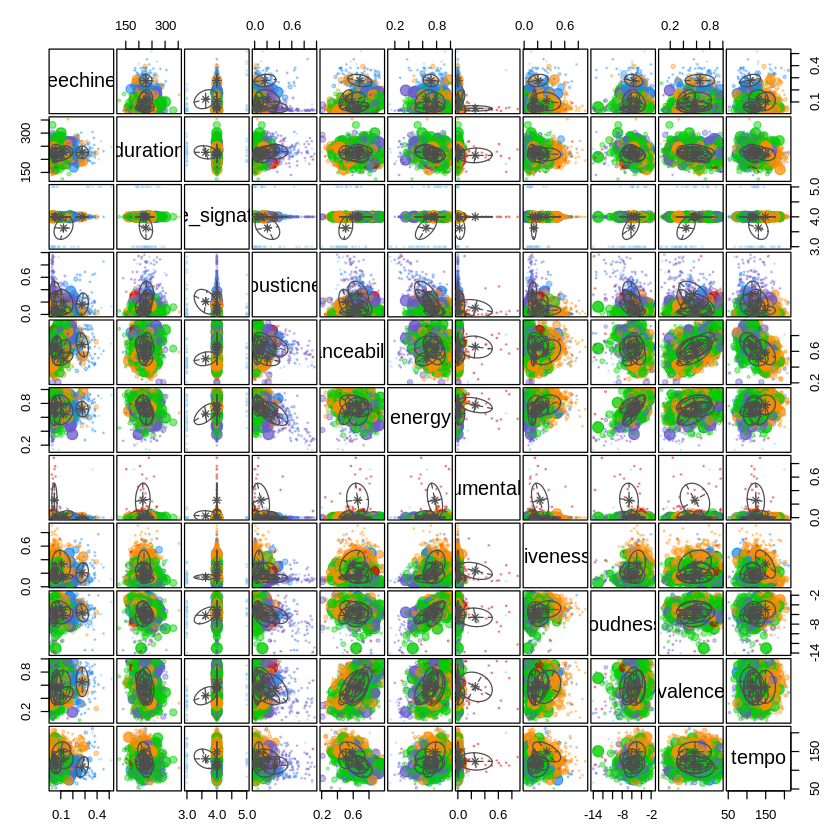

---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust EEV (ellipsoidal, equal volume and shape) model with 6 components: 

 log-likelihood    n  df       BIC       ICL
      -1467.581 1196 412 -5854.898 -6140.596

Clustering table:
  1   2   3   4   5   6 
108  34 607 219 188  40 

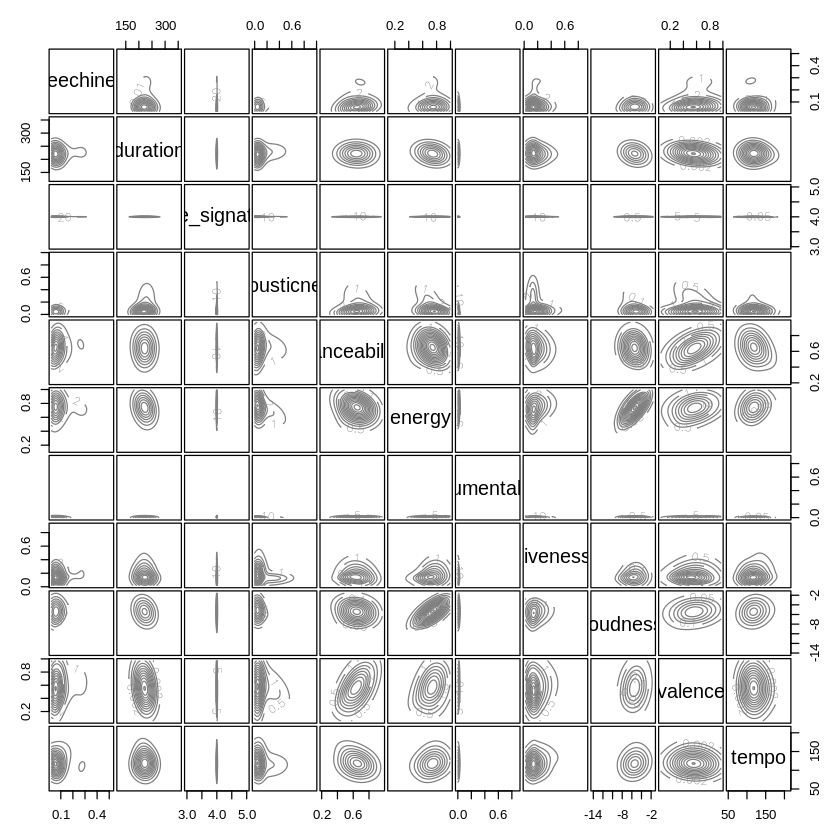

In [38]:
# Model Based Clustering
library(mclust)
plot(Mclust(Num_Data)) # plot results
summary(Mclust(Num_Data))
